In [82]:

import pandas as pd
import numpy as np

from datetime import datetime

from sklearn.pipeline import Pipeline
from sklearn import metrics


import matplotlib.pyplot as plt
import seaborn as sns

# try:
#     from autoviz.AutoViz_Class import AutoViz_Class
# except:
#     !pip install autoviz
#     from autoviz.AutoViz_Class import AutoViz_Class  

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [83]:
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class  


In [84]:
data = pd.read_csv("TRAIN.csv", index_col=0, parse_dates=['Date'])
unseen = pd.read_csv("TEST_FINAL.csv",index_col=0, parse_dates=['Date'])

print(data.shape)
print(unseen.shape)

(188340, 9)
(22265, 7)


In [85]:
data.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
ID,,,,,,,,,
T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [86]:
data = data.sort_values(['Date', 'Store_id'], ascending=[True, True])

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188340 entries, T1000001 to T1187984
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store_id       188340 non-null  int64         
 1   Store_Type     188340 non-null  object        
 2   Location_Type  188340 non-null  object        
 3   Region_Code    188340 non-null  object        
 4   Date           188340 non-null  datetime64[ns]
 5   Holiday        188340 non-null  int64         
 6   Discount       188340 non-null  object        
 7   #Order         188340 non-null  int64         
 8   Sales          188340 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 14.4+ MB


In [88]:
# percentage of missing values in each column
round(100*(data.isnull().sum()/len(data)), 2).sort_values(ascending=False)

Store_id         0.0
Store_Type       0.0
Location_Type    0.0
Region_Code      0.0
Date             0.0
Holiday          0.0
Discount         0.0
#Order           0.0
Sales            0.0
dtype: float64

In [89]:
data_dup = data.copy()

# Checking for duplicates and dropping the entire duplicate row if any
data_dup.drop_duplicates(subset=None, inplace=True)
print(data.shape)
print(data_dup.shape)

(188340, 9)
(188340, 9)


In [90]:
data.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
ID,,,,,,,,,
T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
T1000115,2,S3,L1,R3,2018-01-01,1,Yes,25,18137.52
T1000128,3,S4,L2,R1,2018-01-01,1,Yes,72,57288.00
T1000097,4,S1,L1,R2,2018-01-01,1,Yes,80,53615.52
T1000133,5,S1,L1,R3,2018-01-01,1,Yes,47,36316.08


In [91]:
data.Store_Type.value_counts()

S1    88752
S4    45924
S2    28896
S3    24768
Name: Store_Type, dtype: int64

In [92]:
data.Location_Type.value_counts()

L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: Location_Type, dtype: int64

In [93]:
data.Region_Code.value_counts()

R1    63984
R2    54180
R3    44376
R4    25800
Name: Region_Code, dtype: int64

In [94]:
train      = data[data['Date']<= datetime(2018,12,31)]
validation = data[data['Date']> datetime(2018,12,31)]

print(train.shape)
print(validation.shape)

(133225, 9)
(55115, 9)


In [95]:
# Average sales by store_id
avg_sales_by_store_id = train.groupby(["Store_id"])["Sales"].median().to_dict()

In [96]:
train["Store_id"].replace(avg_sales_by_store_id, inplace=True)

In [97]:
train["Discount"].replace({'Yes':1,'No':0}, inplace=True)

In [98]:
eda_data_new=train.copy()

In [99]:
num_cols=list(train.columns)
print(num_cols)

['Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date', 'Holiday', 'Discount', '#Order', 'Sales']


In [100]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]],drop_first=True)
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

train = encode_and_bind(train,"Store_Type")
train = encode_and_bind(train,"Location_Type")
train = encode_and_bind(train,"Region_Code")

train.drop(["Store_Type","Location_Type", "Region_Code"],axis=1,inplace=True)

In [101]:
train.head()

,Store_id,Date,Holiday,Discount,#Order,Sales,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R2,Region_Code_R3,Region_Code_R4
ID,,,,,,,,,,,,,,,,
T1000001,34206.0,2018-01-01,1,1,9,7011.84,0,0,0,0,1,0,0,0,0,0
T1000115,45045.0,2018-01-01,1,1,25,18137.52,0,1,0,0,0,0,0,0,1,0
T1000128,59613.0,2018-01-01,1,1,72,57288.00,0,0,1,1,0,0,0,0,0,0
T1000097,38220.0,2018-01-01,1,1,80,53615.52,0,0,0,0,0,0,0,1,0,0
T1000133,41928.0,2018-01-01,1,1,47,36316.08,0,0,0,0,0,0,0,0,1,0


## Feature Engineering

In [102]:
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day
train['Dayofyear'] = train['Date'].dt.dayofyear
train['Weekofyear'] = train['Date'].dt.weekofyear
train['Dayofweek'] = train['Date'].dt.dayofweek
train['is_month_start'] = train['Date'].dt.is_month_start.astype(int)
train['is_month_end'] = train['Date'].dt.is_month_end.astype(int)
train['is_quarter_start'] = train['Date'].dt.is_quarter_start.astype(int)
train['is_quarter_end'] = train['Date'].dt.is_quarter_end.astype(int)

In [103]:
import math
print(np.sin(math.pi))

1.2246467991473532e-16


In [104]:
train['Dayofweek_sin_transform']=np.sin(2*math.pi*train['Dayofweek']/6)
train['Dayofweek_cos_transform']=np.cos(2*math.pi*train['Dayofweek']/6)
train['Month_sin_transform']=np.sin(2*math.pi*train['Month']/12) 
train['Month_cos_transform']=np.cos(2*math.pi*train['Month']/12)
#we divide by 6 or 12 to have a period of 6 and 12 instead of 2pi

In [105]:
train.head()

,Store_id,Date,Holiday,Discount,#Order,Sales,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,...,Weekofyear,Dayofweek,is_month_start,is_month_end,is_quarter_start,is_quarter_end,Dayofweek_sin_transform,Dayofweek_cos_transform,Month_sin_transform,Month_cos_transform
ID,,,,,,,,,,,,,,,,,,,,,
T1000001,34206.0,2018-01-01,1,1,9,7011.84,0,0,0,0,...,1,0,1,0,1,0,0.0,1.0,0.5,0.866025
T1000115,45045.0,2018-01-01,1,1,25,18137.52,0,1,0,0,...,1,0,1,0,1,0,0.0,1.0,0.5,0.866025
T1000128,59613.0,2018-01-01,1,1,72,57288.00,0,0,1,1,...,1,0,1,0,1,0,0.0,1.0,0.5,0.866025
T1000097,38220.0,2018-01-01,1,1,80,53615.52,0,0,0,0,...,1,0,1,0,1,0,0.0,1.0,0.5,0.866025
T1000133,41928.0,2018-01-01,1,1,47,36316.08,0,0,0,0,...,1,0,1,0,1,0,0.0,1.0,0.5,0.866025


<AxesSubplot:xlabel='Store_id', ylabel='Density'>

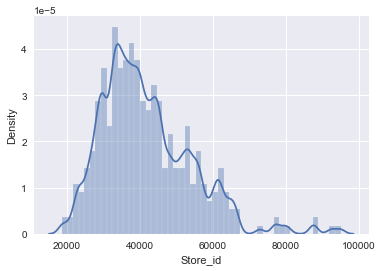

In [106]:
sns.distplot(train['Store_id'])

<AxesSubplot:xlabel='Sales', ylabel='Density'>

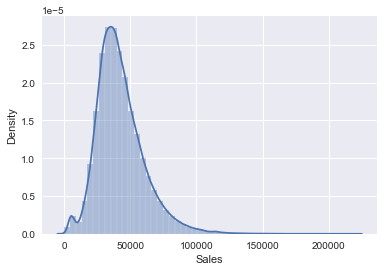

In [107]:
#sns.pairplot(train,corner=True,diag_kind='kde')
sns.distplot(train['Sales'])

<AxesSubplot:ylabel='Density'>

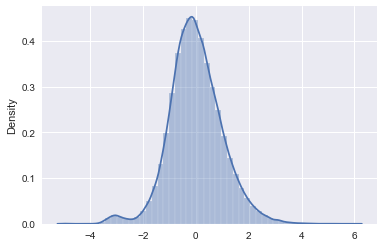

In [108]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

sales_transform = pt.fit_transform(train['Sales'].values[:,np.newaxis])
sns.distplot(sales_transform)

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
store_id_scale=scaler.fit_transform(train['Store_id'][:,np.newaxis])

In [110]:
store_id_scale

array([[0.20410647],
       [0.34594849],
       [0.5365892 ],
       ...,
       [0.27331972],
       [0.14160647],
       [0.12641332]])

In [111]:
train['Store_id']=store_id_scale

In [112]:
train.head()

,Store_id,Date,Holiday,Discount,#Order,Sales,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,...,Weekofyear,Dayofweek,is_month_start,is_month_end,is_quarter_start,is_quarter_end,Dayofweek_sin_transform,Dayofweek_cos_transform,Month_sin_transform,Month_cos_transform
ID,,,,,,,,,,,,,,,,,,,,,
T1000001,0.204106,2018-01-01,1,1,9,7011.84,0,0,0,0,...,1,0,1,0,1,0,0.0,1.0,0.5,0.866025
T1000115,0.345948,2018-01-01,1,1,25,18137.52,0,1,0,0,...,1,0,1,0,1,0,0.0,1.0,0.5,0.866025
T1000128,0.536589,2018-01-01,1,1,72,57288.00,0,0,1,1,...,1,0,1,0,1,0,0.0,1.0,0.5,0.866025
T1000097,0.256635,2018-01-01,1,1,80,53615.52,0,0,0,0,...,1,0,1,0,1,0,0.0,1.0,0.5,0.866025
T1000133,0.305159,2018-01-01,1,1,47,36316.08,0,0,0,0,...,1,0,1,0,1,0,0.0,1.0,0.5,0.866025


### Visuvalization

In [113]:
train.to_csv("train_for_data_viz.csv")

In [114]:
AV = AutoViz_Class()

In [115]:
# dft = AV.AutoViz("train_for_data_viz.csv",depVar="Sales",dfte=None,header=0,verbose=2,lowess=False,)

In [116]:
eda_data=train.copy()

In [117]:
numerical_cols=list(train.columns)

In [118]:
print(numerical_cols)

['Store_id', 'Date', 'Holiday', 'Discount', '#Order', 'Sales', 'Store_Type_S2', 'Store_Type_S3', 'Store_Type_S4', 'Location_Type_L2', 'Location_Type_L3', 'Location_Type_L4', 'Location_Type_L5', 'Region_Code_R2', 'Region_Code_R3', 'Region_Code_R4', 'Month', 'Day', 'Dayofyear', 'Weekofyear', 'Dayofweek', 'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end', 'Dayofweek_sin_transform', 'Dayofweek_cos_transform', 'Month_sin_transform', 'Month_cos_transform']


In [119]:
# plot_cols=['Store_id', 'Holiday', 'Discount', 'Sales', 'Store_Type_S2', 'Store_Type_S3', 'Store_Type_S4', 'Location_Type_L2', 'Location_Type_L3', 'Location_Type_L4', 'Location_Type_L5', 'Region_Code_R2', 'Region_Code_R3', 'Region_Code_R4', 'Month', 'Day', 'Dayofyear', 'Weekofyear', 'Dayofweek', 'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end']
# sns.pairplot(train[plot_cols],hue='Sales',corner=True,diag_kind='kde')

# plt.show()

### Univariate Categorical Analysis

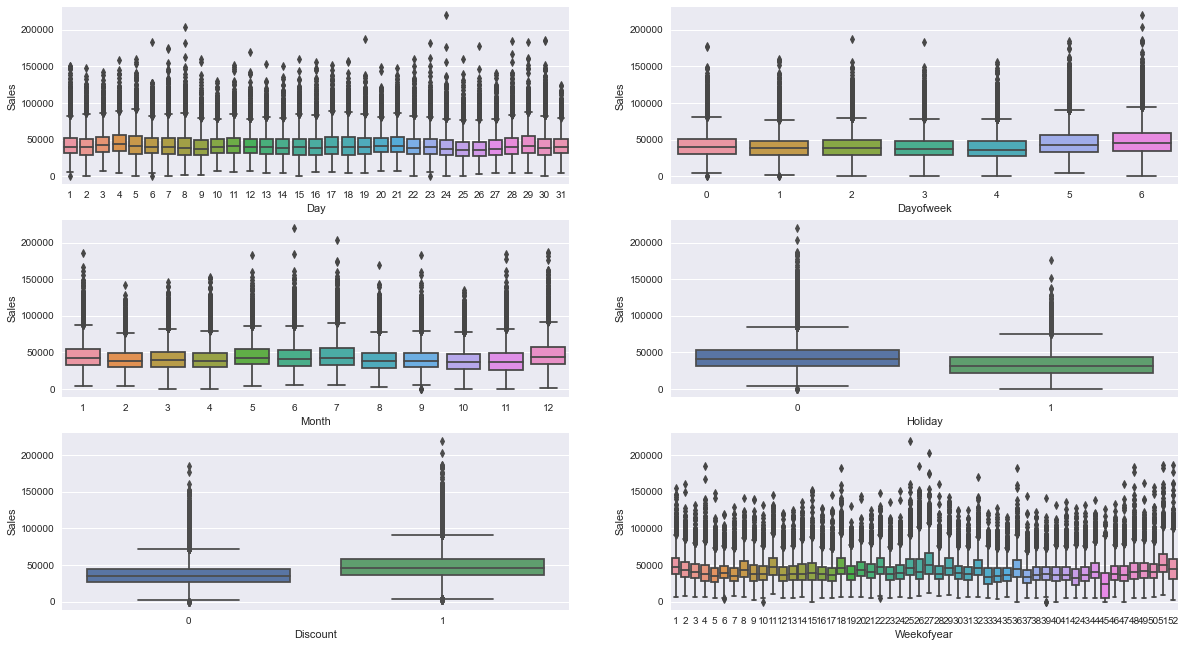

In [120]:
plt.figure(figsize=(20, 15))
plt.subplot(4,2,1)
sns.boxplot(x = 'Day', y = 'Sales', data =eda_data)
plt.subplot(4,2,2)
sns.boxplot(x = 'Dayofweek', y = 'Sales', data =eda_data)
plt.subplot(4,2,3)
sns.boxplot(x = 'Month', y = 'Sales', data =eda_data)
plt.subplot(4,2,4)
sns.boxplot(x = 'Holiday', y = 'Sales', data =eda_data)
plt.subplot(4,2,5)
sns.boxplot(x = 'Discount', y = 'Sales', data =eda_data)
plt.subplot(4,2,6)
sns.boxplot(x = 'Weekofyear', y = 'Sales', data =eda_data)

plt.show()


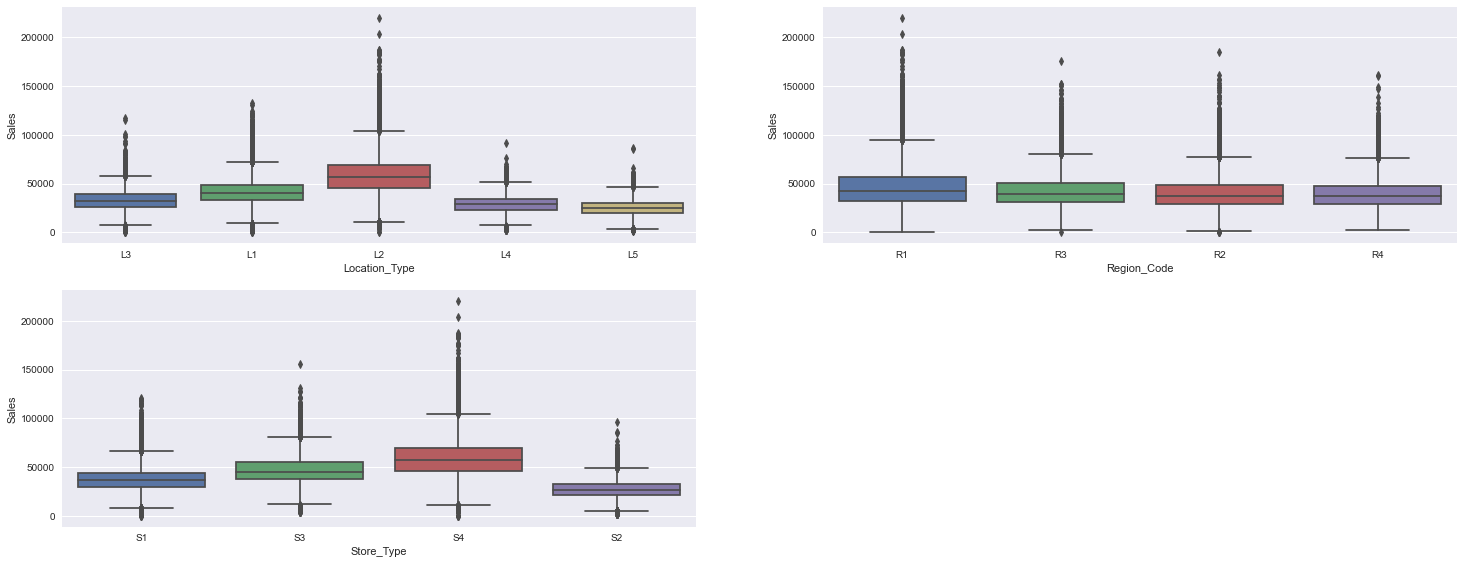

In [121]:
plt.figure(figsize=(25, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'Location_Type', y = 'Sales', data =eda_data_new)
plt.subplot(4,2,2)
sns.boxplot(x = 'Region_Code', y = 'Sales', data =eda_data_new)
plt.subplot(4,2,3)
sns.boxplot(x = 'Store_Type', y = 'Sales', data =eda_data_new)


plt.show()


<AxesSubplot:xlabel='#Order', ylabel='Sales'>

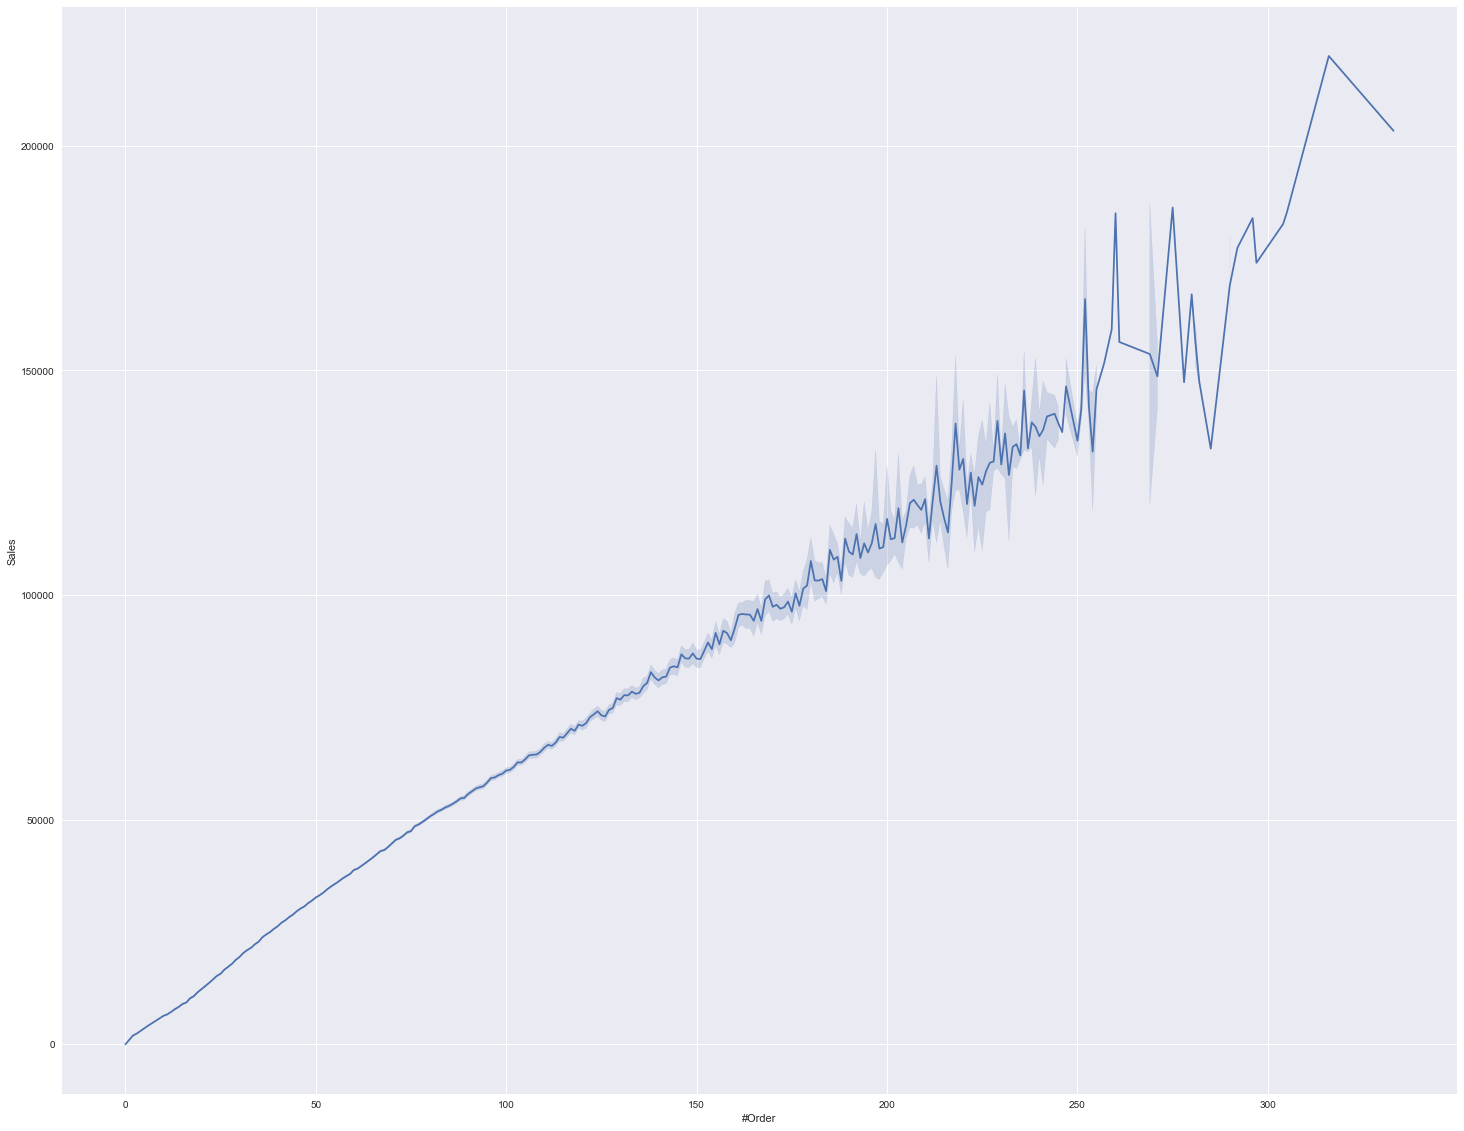

In [122]:
plt.figure(figsize=(25, 20))
sns.lineplot(data=eda_data_new, x="#Order", y="Sales")

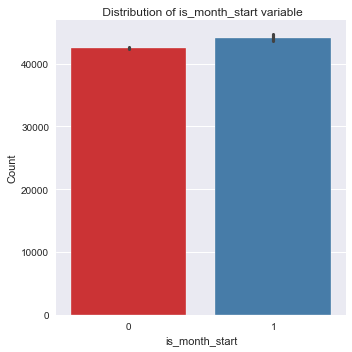

In [123]:
plt.figure(figsize=(5,5))
var='is_month_start'
sns.barplot(x=var,y='Sales',data=eda_data, palette = 'Set1')
plt.title(" Distribution of "+var+" variable")
plt.xlabel(var)
plt.ylabel("Count")

plt.tight_layout() 
plt.show()

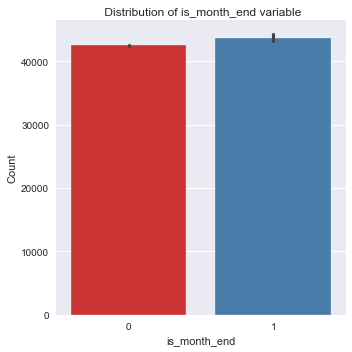

In [124]:
plt.figure(figsize=(5,5))
var='is_month_end'
sns.barplot(x=var,y='Sales',data=eda_data, palette = 'Set1')
plt.title(" Distribution of "+var+" variable")
plt.xlabel(var)
plt.ylabel("Count")

plt.tight_layout() 
plt.show()

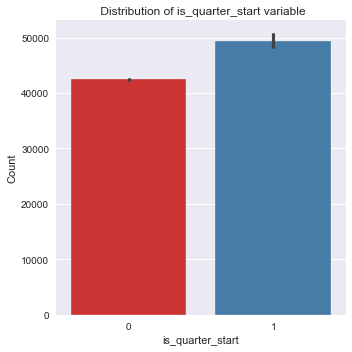

In [125]:
plt.figure(figsize=(5,5))
var='is_quarter_start'
sns.barplot(x=var,y='Sales',data=eda_data, palette = 'Set1')
plt.title(" Distribution of "+var+" variable")
plt.xlabel(var)
plt.ylabel("Count")

plt.tight_layout() 
plt.show()

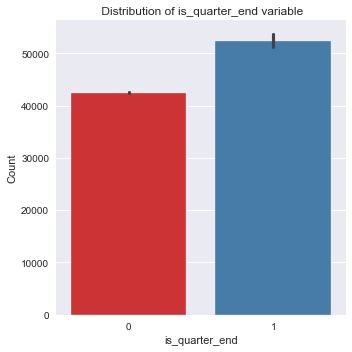

In [126]:
plt.figure(figsize=(5,5))
var='is_quarter_end'
sns.barplot(x=var,y='Sales',data=eda_data, palette = 'Set1')
plt.title(" Distribution of "+var+" variable")
plt.xlabel(var)
plt.ylabel("Count")

plt.tight_layout() 
plt.show()

<AxesSubplot:>

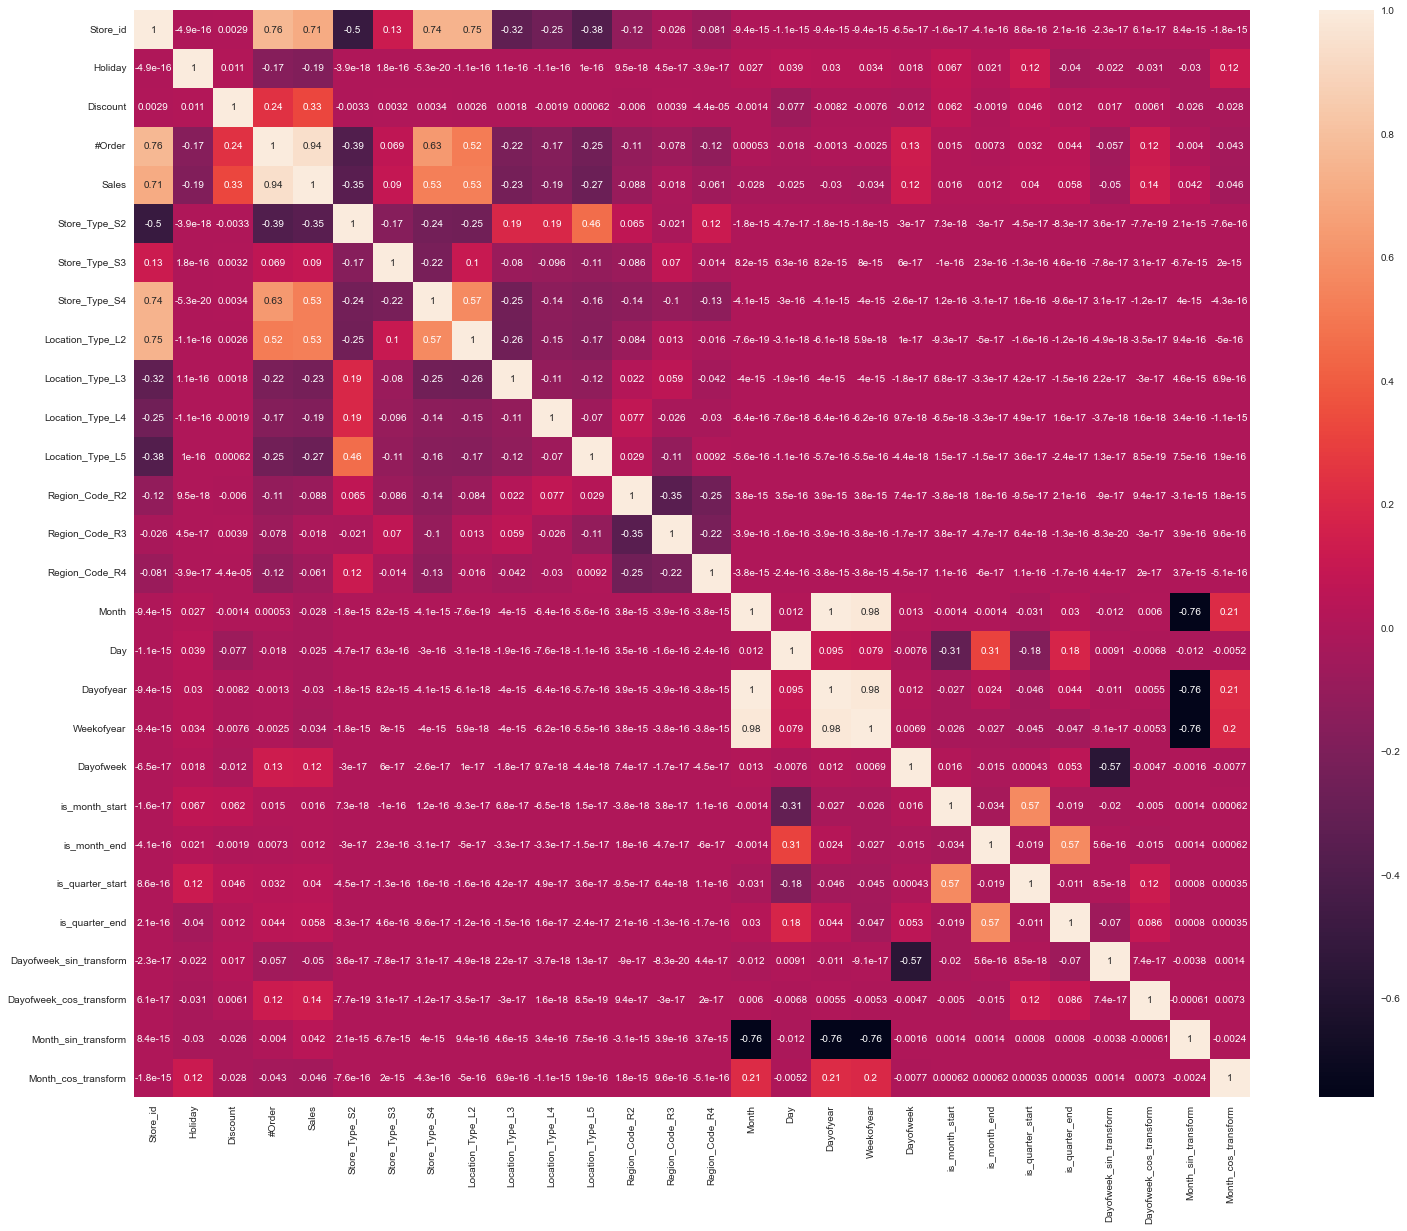

In [127]:
plt.figure(figsize=(25, 20))
sns.heatmap(eda_data[numerical_cols].corr(),annot=True)

<AxesSubplot:>

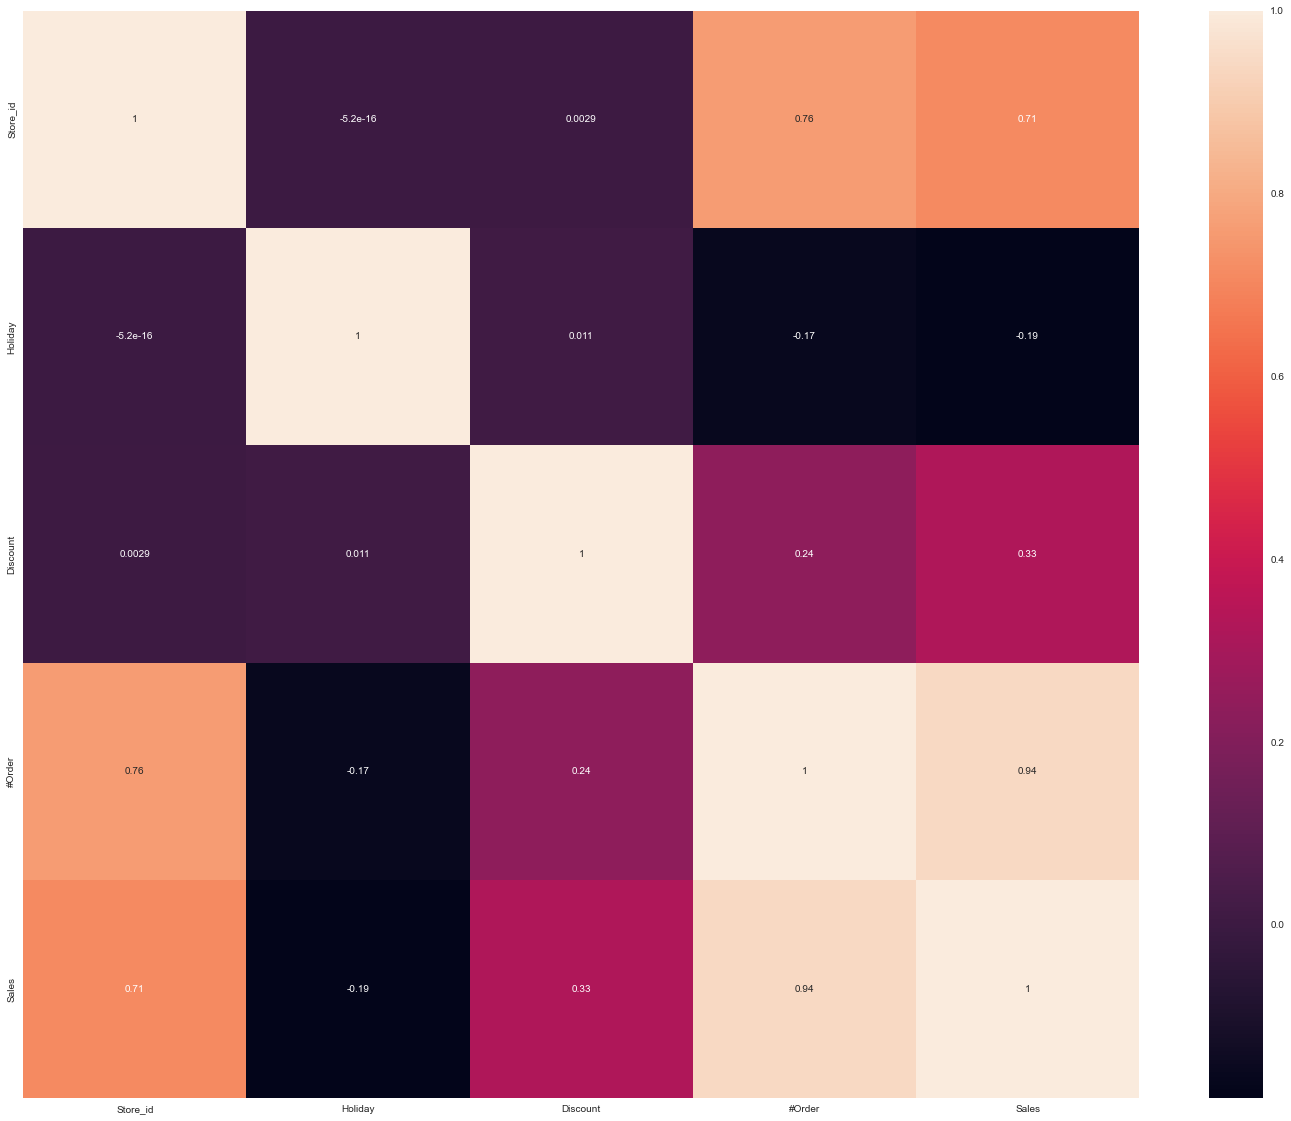

In [128]:
plt.figure(figsize=(25, 20))
sns.heatmap(eda_data_new[num_cols].corr(),annot=True)

In [129]:
train.drop(['Date','#Order','Dayofweek','Month'], axis=1, inplace=True)

In [130]:
y_train = pd.Series(np.ravel(sales_transform), index=train.index)
X_train =train.loc[:,train.columns !='Sales']

In [131]:
X_train.head()

,Store_id,Holiday,Discount,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,...,Dayofyear,Weekofyear,is_month_start,is_month_end,is_quarter_start,is_quarter_end,Dayofweek_sin_transform,Dayofweek_cos_transform,Month_sin_transform,Month_cos_transform
ID,,,,,,,,,,,,,,,,,,,,,
T1000001,0.204106,1,1,0,0,0,0,1,0,0,...,1,1,1,0,1,0,0.0,1.0,0.5,0.866025
T1000115,0.345948,1,1,0,1,0,0,0,0,0,...,1,1,1,0,1,0,0.0,1.0,0.5,0.866025
T1000128,0.536589,1,1,0,0,1,1,0,0,0,...,1,1,1,0,1,0,0.0,1.0,0.5,0.866025
T1000097,0.256635,1,1,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0.0,1.0,0.5,0.866025
T1000133,0.305159,1,1,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0.0,1.0,0.5,0.866025


In [132]:
y_train.head()

ID
T1000001   -2.790544
T1000115   -1.563447
T1000128    0.871821
T1000097    0.693251
T1000133   -0.251945
dtype: float64

## Model Building

In [133]:
from sklearn.feature_selection import RFE,RFECV
from sklearn.linear_model import LinearRegression

In [134]:
#Create a linear regression estimator 

linreg = LinearRegression()

#Use RFECV to pick best features, using Stratified Kfold
rfecv =   RFECV(linreg, cv=5, scoring='neg_mean_squared_error',verbose = 1,n_jobs=-1)

In [135]:

selector = rfecv.fit(X_train, y_train)
selector.support_

Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.


array([ True,  True,  True,  True, False,  True, False,  True,  True,
        True, False, False, False, False, False, False,  True, False,
        True,  True,  True,  True,  True, False])

In [136]:
list(zip(X_train.columns,selector.support_,selector.ranking_))

[('Store_id', True, 1),
 ('Holiday', True, 1),
 ('Discount', True, 1),
 ('Store_Type_S2', True, 1),
 ('Store_Type_S3', False, 2),
 ('Store_Type_S4', True, 1),
 ('Location_Type_L2', False, 4),
 ('Location_Type_L3', True, 1),
 ('Location_Type_L4', True, 1),
 ('Location_Type_L5', True, 1),
 ('Region_Code_R2', False, 8),
 ('Region_Code_R3', False, 11),
 ('Region_Code_R4', False, 6),
 ('Day', False, 7),
 ('Dayofyear', False, 10),
 ('Weekofyear', False, 9),
 ('is_month_start', True, 1),
 ('is_month_end', False, 3),
 ('is_quarter_start', True, 1),
 ('is_quarter_end', True, 1),
 ('Dayofweek_sin_transform', True, 1),
 ('Dayofweek_cos_transform', True, 1),
 ('Month_sin_transform', True, 1),
 ('Month_cos_transform', False, 5)]

In [137]:
print("Optimal number of features from RFECV :")
print(selector.n_features_)

Optimal number of features from RFECV :
14


<AxesSubplot:>

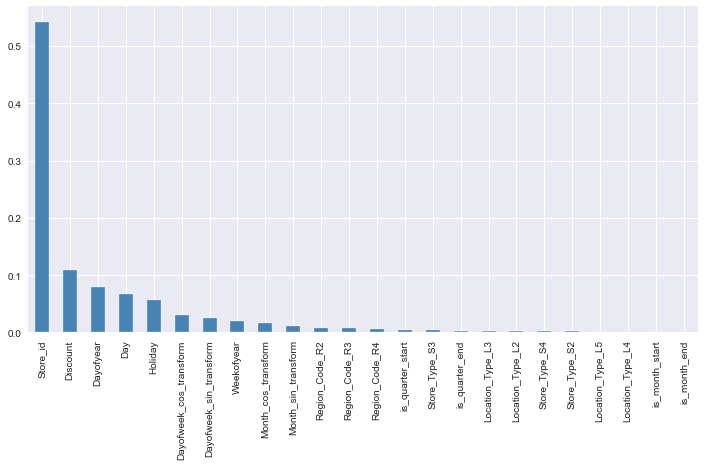

In [138]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)

feat_imp = pd.Series(reg.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feat_imp.plot.bar(color='steelblue', figsize=(12, 6))

<AxesSubplot:>

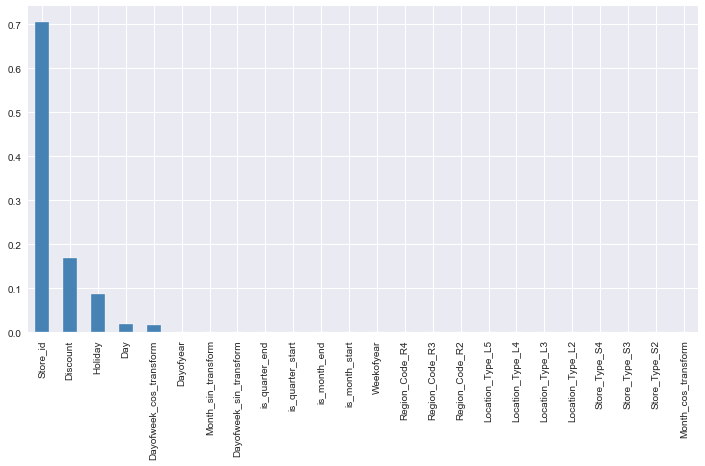

In [139]:
from sklearn.ensemble import RandomForestRegressor
rand_reg = RandomForestRegressor(n_estimators = 100, max_depth=5)
rand_reg.fit(X_train, y_train)

rand_feat_imp = pd.Series(rand_reg.feature_importances_, index=X_train.columns).sort_values(ascending=False)

rand_feat_imp.plot.bar(color='steelblue', figsize=(12, 6))

In [140]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [141]:
X_train_col=X_train.copy()

In [142]:
vif = pd.DataFrame()
X = X_train_col
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
14,Dayofyear,171.37
15,Weekofyear,171.11
0,Store_id,14.85
13,Day,4.83
5,Store_Type_S4,4.20
6,Location_Type_L2,2.90
22,Month_sin_transform,2.23
3,Store_Type_S2,1.96
10,Region_Code_R2,1.93
19,is_quarter_end,1.89


In [143]:
X_train_col.drop('Dayofyear',axis=1, inplace=True)
vif = pd.DataFrame()
X = X_train_col
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Store_id,14.83
14,Weekofyear,8.60
13,Day,4.82
5,Store_Type_S4,4.20
6,Location_Type_L2,2.90
21,Month_sin_transform,2.20
3,Store_Type_S2,1.96
10,Region_Code_R2,1.93
2,Discount,1.80
11,Region_Code_R3,1.76


In [144]:

X_train_1=sm.add_constant(X_train_col)    # Adding constant
X_train_1.shape

(133225, 24)

In [145]:
lm_1 = sm.OLS(y_train,X_train_1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                 1.121e+04
Date:                Sun, 19 Sep 2021   Prob (F-statistic):               0.00
Time:                        13:31:32   Log-Likelihood:            -1.1730e+05
No. Observations:              133225   AIC:                         2.346e+05
Df Residuals:                  133201   BIC:                         2.349e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [146]:
#Removing kw_max_min and building model
X_train_2=X_train_1.drop('Region_Code_R3', axis=1)   

### Model 2

In [147]:
lm_2 = sm.OLS(y_train,X_train_2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                 1.172e+04
Date:                Sun, 19 Sep 2021   Prob (F-statistic):               0.00
Time:                        13:31:33   Log-Likelihood:            -1.1730e+05
No. Observations:              133225   AIC:                         2.346e+05
Df Residuals:                  133202   BIC:                         2.349e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [148]:
#Removing kw_max_min and building model
X_train_3=X_train_2.drop('Region_Code_R2', axis=1)   

### Model 3

In [149]:
lm_3 = sm.OLS(y_train,X_train_3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                 1.228e+04
Date:                Sun, 19 Sep 2021   Prob (F-statistic):               0.00
Time:                        13:31:35   Log-Likelihood:            -1.1730e+05
No. Observations:              133225   AIC:                         2.346e+05
Df Residuals:                  133203   BIC:                         2.349e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [150]:
#Removing kw_max_min and building model
X_train_4=X_train_3.drop('is_month_end', axis=1) 

### model 4

In [151]:
lm_4 = sm.OLS(y_train,X_train_4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                 1.289e+04
Date:                Sun, 19 Sep 2021   Prob (F-statistic):               0.00
Time:                        13:31:36   Log-Likelihood:            -1.1730e+05
No. Observations:              133225   AIC:                         2.346e+05
Df Residuals:                  133204   BIC:                         2.349e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [152]:
#Predict values
y_train_pred_scaled = lm_4.predict(X_train_4)

In [153]:
y_train_scaled_arr = y_train.values.ravel()
print(y_train_scaled_arr.shape)

(133225,)


In [154]:
res=y_train_scaled_arr- y_train_pred_scaled

Text(0, 0.5, 'residual')

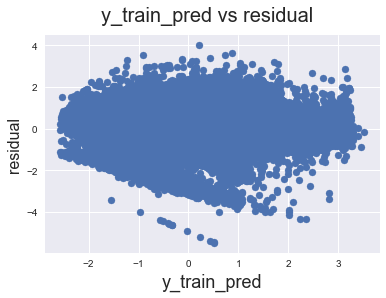

In [155]:
fig = plt.figure()
plt.scatter(y_train_pred_scaled,res)
fig.suptitle('y_train_pred vs residual', fontsize=20)              # Plot heading 
plt.xlabel('y_train_pred', fontsize=18)                          # X-label
plt.ylabel('residual', fontsize=16) 

Text(0.5, 0, 'Errors')

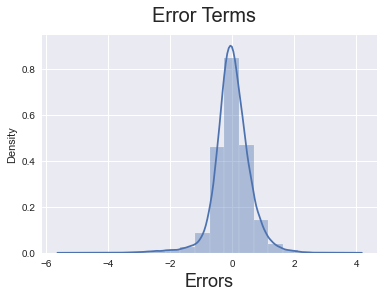

In [156]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

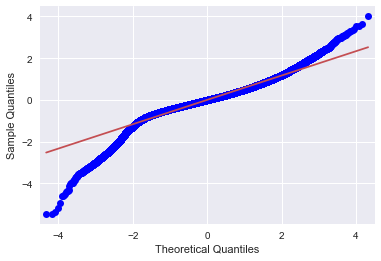

In [157]:
sm.qqplot(res,line='s')
plt.show()

In [158]:
residual_results=pd.DataFrame()
residual_results['Actual'] = y_train
residual_results['predicted'] = y_train_pred_scaled.values
residual_results['residual'] = residual_results['Actual'] - residual_results['predicted']
residual_results['sales']=train['Sales'].values
residual_results['predicted_sales'] = pt.inverse_transform(y_train_pred_scaled[:, np.newaxis])

In [159]:
residual_results.head()

,Actual,predicted,residual,sales,predicted_sales
ID,,,,,
T1000001,-2.790544,-0.199431,-2.591113,7011.84,37183.688371
T1000115,-1.563447,0.451064,-2.014511,18137.52,48841.189000
T1000128,0.871821,1.182539,-0.310718,57288.00,63988.155766
T1000097,0.693251,0.082365,0.610886,53615.52,42026.247278
T1000133,-0.251945,0.254965,-0.506910,36316.08,45148.669578


In [160]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    msle = metrics.mean_squared_log_error(y_true,y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('MSLE: ', round(msle,4))

In [161]:
regression_results(residual_results['sales'].values, residual_results['predicted_sales'].values)

explained_variance:  0.6799
r2:  0.6785
MAE:  7210.201
MSE:  104378684.7039
RMSE:  10216.5887
MSLE:  0.0976


In [162]:
from sklearn.model_selection import GridSearchCV


In [163]:
from xgboost import XGBRegressor

xgbr_pipeline = Pipeline([("xgbr_model", XGBRegressor(objective="reg:squarederror", verbosity=1, 
                                                      random_state=42, n_jobs=-1))])

xgbr_pipeline_params = {
                        "xgbr_model__max_depth": [5],
                        "xgbr_model__learning_rate": [0.01,0.1],
                    }

xgbr_grid_pipeline = GridSearchCV(xgbr_pipeline, xgbr_pipeline_params, scoring= 'neg_mean_squared_error', 
                        cv = 5, 
                        return_train_score=True,
                        n_jobs=-1,
                        verbose = 1)
# fit
xgbr_grid_pipeline.fit(X_train,y_train)
print(xgbr_grid_pipeline.best_params_)
xgbr_model = xgbr_grid_pipeline.best_estimator_
print(xgbr_grid_pipeline.best_score_)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'xgbr_model__learning_rate': 0.1, 'xgbr_model__max_depth': 5}
-0.44169062464907627


In [164]:
y_train_pred_xgbr = xgbr_model.predict(X_train)

In [165]:
xgbr_residual = pd.DataFrame()
xgbr_residual['Actual'] = y_train
xgbr_residual['predicted'] = y_train_pred_xgbr
xgbr_residual['residual'] = xgbr_residual['Actual'] - xgbr_residual['predicted']
xgbr_residual['sales'] = train['Sales'].values
xgbr_residual['predicted_sales'] =  pt.inverse_transform(y_train_pred_xgbr[:,np.newaxis]).ravel()
xgbr_residual.head()

,Actual,predicted,residual,sales,predicted_sales
ID,,,,,
T1000001,-2.790544,-0.155401,-2.635143,7011.84,37919.535156
T1000115,-1.563447,0.085432,-1.648878,18137.52,42080.687500
T1000128,0.871821,0.177135,0.694686,57288.00,43725.933594
T1000097,0.693251,0.011766,0.681485,53615.52,40783.378906
T1000133,-0.251945,0.033662,-0.285608,36316.08,41166.726562


In [166]:
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.neighbors import KNeighborsRegressor


# knn_pipeline = Pipeline([("knn", KNeighborsRegressor())])

# knn_pipeline_params = {'knn__n_neighbors': list(range(40,100,30))}

# knn_grid_pipeline = GridSearchCV(knn_pipeline, knn_pipeline_params, scoring= 'neg_mean_squared_error', 
#                         cv = 5, 
#                         return_train_score=True,
#                         n_jobs=-1,
#                         verbose = 1)
# # fit
# knn_grid_pipeline.fit(X_train, y_train)
# print(knn_grid_pipeline.best_params_)
# knn_model = knn_grid_pipeline.best_estimator_
# print(knn_grid_pipeline.best_score_)


In [167]:
# y_train_pred_knn = knn_model.predict(X_train)

In [168]:
# knn_residual = pd.DataFrame()
# knn_residual['Actual'] = y_train
# knn_residual['predicted'] = y_train_pred_knn
# knn_residual['residual'] = knn_residual['Actual'] - knn_residual['predicted']
# knn_residual['sales'] = train['Sales'].values
# knn_residual['predicted_sales'] = pt.inverse_transform(y_train_pred_knn[:,np.newaxis]).ravel()
# knn_residual.head()

In [169]:
from sklearn.feature_selection import SelectFromModel

rf_pipeline = Pipeline([("rfr", RandomForestRegressor(criterion='mse', random_state=100, max_features='sqrt',n_jobs=-1,verbose=1))])

rf_pipeline_params = {"rfr__n_estimators":[100,200],
           "rfr__max_leaf_nodes":[30,60],
            "rfr__bootstrap":[True ,False]}

rf_grid_pipeline = GridSearchCV(rf_pipeline, rf_pipeline_params, scoring= 'neg_mean_squared_error', 
                        cv = 5, 
                        return_train_score=True,
                        n_jobs=-1,
                        verbose = 1)
# fit
rf_grid_pipeline.fit(X_train, y_train)
print(rf_grid_pipeline.best_params_)
rf_model = rf_grid_pipeline.best_estimator_
print(rf_grid_pipeline.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   20.7s


{'rfr__bootstrap': True, 'rfr__max_leaf_nodes': 60, 'rfr__n_estimators': 200}
-0.41559986469878696


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   21.2s finished


In [170]:
y_train_pred_rf = rf_model.predict(X_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    2.3s finished


In [171]:
rf_residual = pd.DataFrame()
rf_residual['Actual'] = y_train
rf_residual['predicted'] = y_train_pred_rf
rf_residual['residual'] = rf_residual['Actual'] - rf_residual['predicted']
rf_residual['sales'] = train['Sales'].values
rf_residual['predicted_sales'] = pt.inverse_transform(y_train_pred_rf[:,np.newaxis]).ravel()
rf_residual.head()

,Actual,predicted,residual,sales,predicted_sales
ID,,,,,
T1000001,-2.790544,-0.037253,-2.753291,7011.84,39932.084332
T1000115,-1.563447,0.289709,-1.853156,18137.52,45791.620890
T1000128,0.871821,0.705949,0.165872,57288.00,53872.390238
T1000097,0.693251,0.129319,0.563933,53615.52,42863.866607
T1000133,-0.251945,0.204518,-0.456463,36316.08,44223.726278


In [177]:
from sklearn.tree import DecisionTreeRegressor
dt_pipeline = Pipeline([("dtr",  DecisionTreeRegressor(criterion='mse', random_state=100, max_features='sqrt'))])

dt_pipeline_params = {"dtr__max_depth":[5,7],
           "dtr__max_leaf_nodes":[30,60]}

dt_grid_pipeline = GridSearchCV(dt_pipeline, dt_pipeline_params, scoring= 'neg_mean_squared_error', 
                        cv = 5, 
                        return_train_score=True,
                        n_jobs=-1,
                        verbose = 1)
# fit
dt_grid_pipeline.fit(X_train, y_train)
print(dt_grid_pipeline.best_params_)
dt_model = dt_grid_pipeline.best_estimator_
print(dt_grid_pipeline.best_score_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'dtr__max_depth': 7, 'dtr__max_leaf_nodes': 30}
-0.5200040003199936


In [178]:
y_train_pred_dt = dt_model.predict(X_train)

In [179]:
dt_residual = pd.DataFrame()
dt_residual['Actual'] = y_train
dt_residual['predicted'] = y_train_pred_dt
dt_residual['residual'] = dt_residual['Actual'] - dt_residual['predicted']
dt_residual['sales'] = train['Sales'].values
dt_residual['predicted_sales'] = pt.inverse_transform(y_train_pred_dt[:,np.newaxis]).ravel()
dt_residual.head()

,Actual,predicted,residual,sales,predicted_sales
ID,,,,,
T1000001,-2.790544,0.050465,-2.841009,7011.84,41462.196142
T1000115,-1.563447,0.484805,-2.048252,18137.52,49492.119270
T1000128,0.871821,1.288126,-0.416304,57288.00,66354.976637
T1000097,0.693251,0.050465,0.642786,53615.52,41462.196142
T1000133,-0.251945,0.050465,-0.302410,36316.08,41462.196142


In [180]:
from sklearn.ensemble import ExtraTreesRegressor
et_pipeline = Pipeline([("etr",ExtraTreesRegressor(criterion='mse', random_state=100, max_features='sqrt',n_jobs=-1,verbose=1))])

et_pipeline_params = {"etr__n_estimators":[100,200],
           "etr__max_leaf_nodes":[30,60],
            "etr__bootstrap":[True ,False],
            "etr__max_depth":[5,7]}

et_grid_pipeline = GridSearchCV(et_pipeline, et_pipeline_params, scoring= 'neg_mean_squared_error', 
                        cv = 5, 
                        return_train_score=True,
                        n_jobs=-1,
                        verbose = 1)
# fit
et_grid_pipeline.fit(X_train, y_train)
print(et_grid_pipeline.best_params_)
et_model = et_grid_pipeline.best_estimator_
print(et_grid_pipeline.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   12.6s


{'etr__bootstrap': True, 'etr__max_depth': 7, 'etr__max_leaf_nodes': 60, 'etr__n_estimators': 200}
-0.42457515657501377


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   12.8s finished


In [181]:
y_train_pred_et = et_model.predict(X_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    2.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    2.1s finished


In [182]:
et_residual = pd.DataFrame()
et_residual['Actual'] = y_train
et_residual['predicted'] = y_train_pred_et
et_residual['residual'] = et_residual['Actual'] - et_residual['predicted']
et_residual['sales'] = train['Sales'].values
et_residual['predicted_sales'] = pt.inverse_transform(y_train_pred_et[:,np.newaxis]).ravel()
et_residual.head()

,Actual,predicted,residual,sales,predicted_sales
ID,,,,,
T1000001,-2.790544,-0.160395,-2.630149,7011.84,37835.689012
T1000115,-1.563447,0.174764,-1.738211,18137.52,43682.970366
T1000128,0.871821,0.781808,0.090013,57288.00,55420.579690
T1000097,0.693251,-0.009733,0.702984,53615.52,40408.837200
T1000133,-0.251945,0.062567,-0.314513,36316.08,41675.716036


In [185]:
from sklearn.ensemble import GradientBoostingRegressor
gb_pipeline = Pipeline([("gbr",  GradientBoostingRegressor(loss='ls', subsample = 0.7, random_state=100, max_features='sqrt'))])

gb_pipeline_params = {"gbr__n_estimators":[200],
                      "gbr__learning_rate":[0.01,0.1],
                      "gbr__max_depth":[3,5],
                      "gbr__max_leaf_nodes":[30,60]}

gb_grid_pipeline = GridSearchCV(gb_pipeline, gb_pipeline_params, scoring= 'neg_mean_squared_error', 
                        cv = 5, 
                        return_train_score=True,
                        n_jobs=-1,
                        verbose = 1)
# fit
gb_grid_pipeline.fit(X_train, y_train)
print(gb_grid_pipeline.best_params_)
gb_model = gb_grid_pipeline.best_estimator_
print(gb_grid_pipeline.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'gbr__learning_rate': 0.01, 'gbr__max_depth': 5, 'gbr__max_leaf_nodes': 30, 'gbr__n_estimators': 200}
-0.41841150995304466


In [186]:
y_train_pred_gb = gb_model.predict(X_train)

In [187]:
gb_residual = pd.DataFrame()
gb_residual['Actual'] = y_train
gb_residual['predicted'] = y_train_pred_gb
gb_residual['residual'] = gb_residual['Actual'] - gb_residual['predicted']
gb_residual['sales'] = train['Sales'].values
gb_residual['predicted_sales'] = pt.inverse_transform(y_train_pred_gb[:,np.newaxis]).ravel()
gb_residual.head()

,Actual,predicted,residual,sales,predicted_sales
ID,,,,,
T1000001,-2.790544,-0.111251,-2.679293,7011.84,38665.109566
T1000115,-1.563447,0.183419,-1.746866,18137.52,43839.909758
T1000128,0.871821,0.596228,0.275593,57288.00,51674.376303
T1000097,0.693251,0.023854,0.669397,53615.52,40994.778508
T1000133,-0.251945,0.098750,-0.350695,36316.08,42317.542318


In [194]:
from sklearn.ensemble import BaggingRegressor
bag_pipeline = Pipeline([("bagr",BaggingRegressor(base_estimator = DecisionTreeRegressor() ,random_state=100, 
                                                  bootstrap = True, bootstrap_features = True, n_jobs=-1,verbose=1))])

bag_pipeline_params = {"bagr__n_estimators":[100,200]}

bag_grid_pipeline = GridSearchCV(bag_pipeline, bag_pipeline_params, scoring= 'neg_mean_squared_error', 
                        cv = 5, 
                        return_train_score=True,
                        n_jobs=-1,
                        verbose = 1)
# fit
bag_grid_pipeline.fit(X_train, y_train)
print(bag_grid_pipeline.best_params_)
bag_model = bag_grid_pipeline.best_estimator_
print(bag_grid_pipeline.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


{'bagr__n_estimators': 200}
-0.4325571825521057


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:  2.4min remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:  2.4min finished


In [195]:
y_train_pred_bag = bag_model.predict(X_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   18.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   18.6s finished


In [196]:
bag_residual = pd.DataFrame()
bag_residual['Actual'] = y_train
bag_residual['predicted'] = y_train_pred_bag
bag_residual['residual'] = bag_residual['Actual'] - bag_residual['predicted']
bag_residual['sales'] = train['Sales'].values
bag_residual['predicted_sales'] = pt.inverse_transform(y_train_pred_bag[:,np.newaxis]).ravel()
bag_residual.head()

,Actual,predicted,residual,sales,predicted_sales
ID,,,,,
T1000001,-2.790544,-1.102305,-1.688240,7011.84,23772.147314
T1000115,-1.563447,-0.617657,-0.945790,18137.52,30575.396946
T1000128,0.871821,0.484934,0.386887,57288.00,49494.622174
T1000097,0.693251,0.222539,0.470712,53615.52,44552.978689
T1000133,-0.251945,-0.121749,-0.130196,36316.08,38487.126388


In [199]:
from sklearn.ensemble import AdaBoostRegressor
ada_pipeline = Pipeline([("adar", AdaBoostRegressor(random_state=100))])

ada_pipeline_params = {"adar__n_estimators":[100,200],
            "adar__learning_rate":[0.01, 0.1]}

ada_grid_pipeline = GridSearchCV(ada_pipeline, ada_pipeline_params, scoring= 'neg_mean_squared_error', 
                        cv = 5, 
                        return_train_score=True,
                        n_jobs=-1,
                        verbose = 1)
# fit
ada_grid_pipeline.fit(X_train, y_train)
print(ada_grid_pipeline.best_params_)
ada_model = ada_grid_pipeline.best_estimator_
print(ada_grid_pipeline.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'adar__learning_rate': 0.1, 'adar__n_estimators': 100}
-0.4495889377165441


In [200]:
y_train_pred_ada = ada_model.predict(X_train)

In [201]:
ada_residual = pd.DataFrame()
ada_residual['Actual'] = y_train
ada_residual['predicted'] = y_train_pred_ada
ada_residual['residual'] = ada_residual['Actual'] - ada_residual['predicted']
ada_residual['sales'] = train['Sales'].values
ada_residual['predicted_sales'] = pt.inverse_transform(y_train_pred_ada[:,np.newaxis]).ravel()
ada_residual.head()

,Actual,predicted,residual,sales,predicted_sales
ID,,,,,
T1000001,-2.790544,-0.400691,-2.389853,7011.84,33917.706681
T1000115,-1.563447,-0.633930,-0.929517,18137.52,30332.150894
T1000128,0.871821,-0.419486,1.291307,57288.00,33620.875844
T1000097,0.693251,-0.278069,0.971320,53615.52,35888.546272
T1000133,-0.251945,-0.633930,0.381985,36316.08,30332.150894


In [ ]:
# from sklearn.svm import SVR

In [ ]:
# svr_pipeline = Pipeline([("svr", SVR(kernel='rbf'))])
# svr_pipeline_params = {"svr__C":[0.01, 0.1]}

# svr_grid_pipeline = GridSearchCV(svr_pipeline, svr_pipeline_params, scoring= 'neg_mean_squared_error', 
#                         cv = 5, 
#                         return_train_score=True,
#                         n_jobs=-1,
#                         verbose = 1)
# # fit
# svr_grid_pipeline.fit(X_train, y_train)
# print(svr_grid_pipeline.best_params_)
# svr_model = svr_grid_pipeline.best_estimator_
# print(svr_grid_pipeline.best_score_)

In [ ]:
# y_train_pred_svr = svr_model.predict(X_train)

In [ ]:
# svr_residual = pd.DataFrame()
# svr_residual['Actual'] = y_train
# svr_residual['predicted'] = y_train_pred_svr
# svr_residual['residual'] = svr_residual['Actual'] - svr_residual['predicted']
# svr_residual['sales'] = train['Sales'].values
# svr_residual['predicted_sales'] = pt.inverse_transform(y_train_pred_svr[:,np.newaxis]).ravel()
# svr_residual.head()

## Predictions on the test dataset

In [294]:
validation = data[data['Date']> datetime(2018,12,31)]

print(validation.shape)
validation["Store_id"].replace(avg_sales_by_store_id, inplace=True)
validation["Discount"].replace({'Yes':1,'No':0}, inplace=True)


(55115, 9)


In [295]:
validation.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
ID,,,,,,,,,
T1133439,34206.0,S1,L3,R1,2019-01-01,1,1,54,36021.96
T1133282,45045.0,S3,L1,R3,2019-01-01,1,0,62,40927.41
T1133464,59613.0,S4,L2,R1,2019-01-01,1,1,84,50425.62
T1133497,38220.0,S1,L1,R2,2019-01-01,1,0,47,31112.88
T1133493,41928.0,S1,L1,R3,2019-01-01,1,1,55,41358.24


In [296]:
validation = encode_and_bind(validation,"Store_Type")
validation = encode_and_bind(validation,"Location_Type")
validation = encode_and_bind(validation,"Region_Code")

In [297]:

validation.drop(["Store_Type","Location_Type", "Region_Code"],axis=1,inplace=True)

validation.head()

,Store_id,Date,Holiday,Discount,#Order,Sales,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R2,Region_Code_R3,Region_Code_R4
ID,,,,,,,,,,,,,,,,
T1133439,34206.0,2019-01-01,1,1,54,36021.96,0,0,0,0,1,0,0,0,0,0
T1133282,45045.0,2019-01-01,1,0,62,40927.41,0,1,0,0,0,0,0,0,1,0
T1133464,59613.0,2019-01-01,1,1,84,50425.62,0,0,1,1,0,0,0,0,0,0
T1133497,38220.0,2019-01-01,1,0,47,31112.88,0,0,0,0,0,0,0,1,0,0
T1133493,41928.0,2019-01-01,1,1,55,41358.24,0,0,0,0,0,0,0,0,1,0


In [298]:
validation['Month'] = validation['Date'].dt.month
validation['Day'] = validation['Date'].dt.day
validation['Dayofyear'] = validation['Date'].dt.dayofyear
validation['Weekofyear'] = validation['Date'].dt.weekofyear
validation['Dayofweek'] = validation['Date'].dt.dayofweek
validation['is_month_start'] = validation['Date'].dt.is_month_start.astype(int)
validation['is_month_end'] = validation['Date'].dt.is_month_end.astype(int)
validation['is_quarter_start'] = validation['Date'].dt.is_quarter_start.astype(int)
validation['is_quarter_end'] = validation['Date'].dt.is_quarter_end.astype(int)

validation.drop(['Date', '#Order'], axis=1, inplace=True)


In [299]:
validation['Dayofweek_sin_transform']=np.sin(2*math.pi*validation['Dayofweek']/6)
validation['Dayofweek_cos_transform']=np.cos(2*math.pi*validation['Dayofweek']/6)
validation['Month_sin_transform']=np.sin(2*math.pi*validation['Month']/12) 
validation['Month_cos_transform']=np.cos(2*math.pi*validation['Month']/12)
#we divide by 6 or 12 to have a period of 6 and 12 instead of 2pi

In [302]:
validation['Store_id'].values[:,np.newaxis]

array([[34206.],
       [45045.],
       [59613.],
       ...,
       [39495.],
       [29430.],
       [28269.]])

In [306]:
store_id_scale_1=scaler.transform(validation['Store_id'].values[:,np.newaxis])
store_id_scale_1[:5]

array([[0.20410647],
       [0.34594849],
       [0.5365892 ],
       [0.25663474],
       [0.30515861]])

In [307]:
validation['Store_id']=store_id_scale_1

In [308]:
sales_transform_val = pt.transform(validation['Sales'].values[:,np.newaxis])

In [309]:
y_validation = pd.Series(np.ravel(sales_transform_val), index=validation.index)
X_validation =validation.loc[:,validation.columns !='Sales']

In [310]:
X_validation.head()

,Store_id,Holiday,Discount,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,...,Weekofyear,Dayofweek,is_month_start,is_month_end,is_quarter_start,is_quarter_end,Dayofweek_sin_transform,Dayofweek_cos_transform,Month_sin_transform,Month_cos_transform
ID,,,,,,,,,,,,,,,,,,,,,
T1133439,0.204106,1,1,0,0,0,0,1,0,0,...,1,1,1,0,1,0,0.866025,0.5,0.5,0.866025
T1133282,0.345948,1,0,0,1,0,0,0,0,0,...,1,1,1,0,1,0,0.866025,0.5,0.5,0.866025
T1133464,0.536589,1,1,0,0,1,1,0,0,0,...,1,1,1,0,1,0,0.866025,0.5,0.5,0.866025
T1133497,0.256635,1,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0.866025,0.5,0.5,0.866025
T1133493,0.305159,1,1,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0.866025,0.5,0.5,0.866025


In [322]:
X_validation.drop(['Dayofweek', 'Month'], axis=1, inplace=True)


TypeError: 'tuple' object is not callable

In [323]:
X_validation.shape

(55115, 24)

### Linear Regression Model

In [324]:

def plot_errors(model,X_input, y_actual, title):
    y_train_pred = model.predict(X_input)
    try:
        residu=y_actual.values.ravel()- y_train_pred.ravel() ##can use reshape(-1,1) instead of ravel to covert to (n,)
    except:
        residu=y_actual.values.ravel()- y_train_pred.values

    fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3,figsize=(16,4))

    ax1.scatter(y_train_pred,residu)
    ax1.set_xlabel('y_pred')                          # X-label
    ax1.set_ylabel('residual') 
    ax1.set_title('y_pred vs residual')

    sns.distplot((residu), bins = 20,ax=ax2)
    ax2.set_xlabel('Errors')                         # X-label
    ax2.set_title('Density plot of residuals')

    sm.qqplot(residu,line='s',ax=ax3)
    ax3.set_title('QQ Plot')
    plt.suptitle(title)
    plt.show()



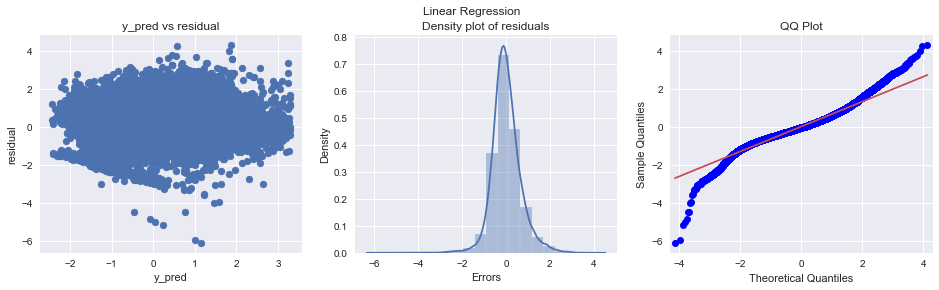

In [325]:
plot_errors(lm_4, sm.add_constant(X_validation)[X_train_4.columns], y_validation, 'Linear Regression')

In [326]:

def residual_errors(model,X_input, y_actual):
    y_train_pred = model.predict(X_input)
    residual_results=pd.DataFrame()
    residual_results['Actual'] =y_actual.values.ravel()
    residual_results['predicted'] = y_train_pred.ravel()
    residual_results['residual'] = residual_results['Actual'] - residual_results['predicted']
    residual_results['sales']= validation['Sales'].copy()
    residual_results['predicted_sales'] = pt.inverse_transform(y_train_pred[:, np.newaxis])
    residual_results.index = X_input.index
    return residual_results

In [327]:
test_residual_results_lr = residual_errors(lm_3, sm.add_constant(X_validation)[X_train_3.columns], y_validation)

In [328]:
test_residual_results_lr['sales'] = validation['Sales'].copy()
test_residual_results_lr.head()

,Actual,predicted,residual,sales,predicted_sales
ID,,,,,
T1133439,-0.269899,-0.361939,0.092040,36021.96,34534.141175
T1133282,0.020006,-0.381910,0.401916,40927.41,34215.721350
T1133464,0.532782,1.020031,-0.487249,50425.62,60434.692631
T1133497,-0.581943,-0.750610,0.168667,31112.88,28618.291613
T1133493,0.044560,0.092457,-0.047896,41358.24,42205.533447


In [329]:
def regression_metrics(df, model):

    print("\n")
    print("Regression results for actual shares   : ", model, "\n")
    regression_results(df['sales'].values, df['predicted_sales'].values)

In [330]:
regression_metrics(test_residual_results_lr, 'Linear Regression')



Regression results for actual shares   :  Linear Regression 

explained_variance:  0.5874
r2:  0.5839
MAE:  8664.2169
MSE:  157694103.9829
RMSE:  12557.6313
MSLE:  0.1028


### XGBR on whole dataset

In [331]:
print(X_validation.shape)
print(y_validation.shape)

(55115, 24)
(55115,)


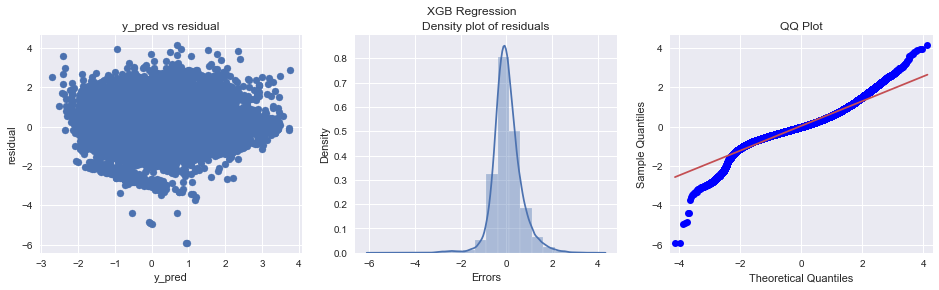

In [332]:
plot_errors(xgbr_model, X_validation, y_validation, 'XGB Regression')

In [333]:
test_residual_results_xgbr = residual_errors(xgbr_model,X_validation, y_validation)

test_residual_results_xgbr['sales'] = validation['Sales'].copy()
test_residual_results_xgbr.head()

,Actual,predicted,residual,sales,predicted_sales
ID,,,,,
T1133439,-0.269899,-0.643044,0.373145,36021.96,30196.359375
T1133282,0.020006,-0.678041,0.698047,40927.41,29677.980469
T1133464,0.532782,0.022089,0.510693,50425.62,40963.871094
T1133497,-0.581943,-1.085454,0.503511,31112.88,23993.445312
T1133493,0.044560,-0.454800,0.499361,41358.24,33066.882812


In [334]:
regression_metrics(test_residual_results_xgbr, 'XGB Regression')



Regression results for actual shares   :  XGB Regression 

explained_variance:  0.6315
r2:  0.6262
MAE:  8050.3478
MSE:  141652629.1436
RMSE:  11901.791
MSLE:  0.0993


### Random Forest Regressor

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.0s finished


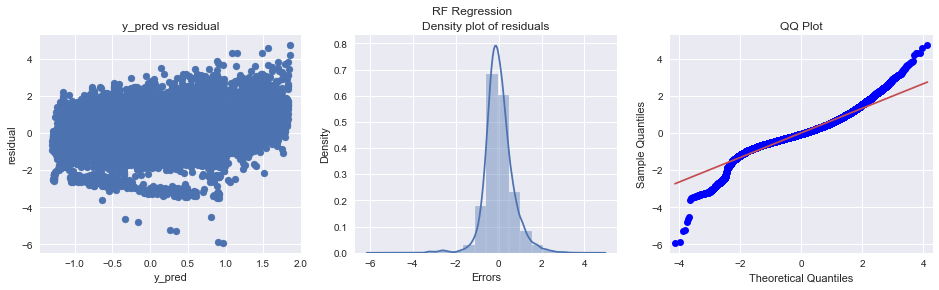

In [336]:
plot_errors(rf_model, X_validation, y_validation, 'RF Regression')

In [337]:
test_residual_results_rf = residual_errors(rf_model,X_validation, y_validation)
test_residual_results_rf['sales'] = validation['Sales'].copy()
test_residual_results_rf.head()

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.1s finished


,Actual,predicted,residual,sales,predicted_sales
ID,,,,,
T1133439,-0.269899,-0.259440,-0.010459,36021.96,36193.138758
T1133282,0.020006,-0.049029,0.069035,40927.41,39729.000962
T1133464,0.532782,0.650819,-0.118038,50425.62,52761.898442
T1133497,-0.581943,-0.344681,-0.237262,31112.88,34810.577348
T1133493,0.044560,-0.033149,0.077709,41358.24,40003.003828


In [338]:
regression_metrics(test_residual_results_rf, 'RF Regression')



Regression results for actual shares   :  RF Regression 

explained_variance:  0.568
r2:  0.5605
MAE:  8611.2569
MSE:  166546193.6544
RMSE:  12905.2777
MSLE:  0.1066


### DecisionTreeRegressor

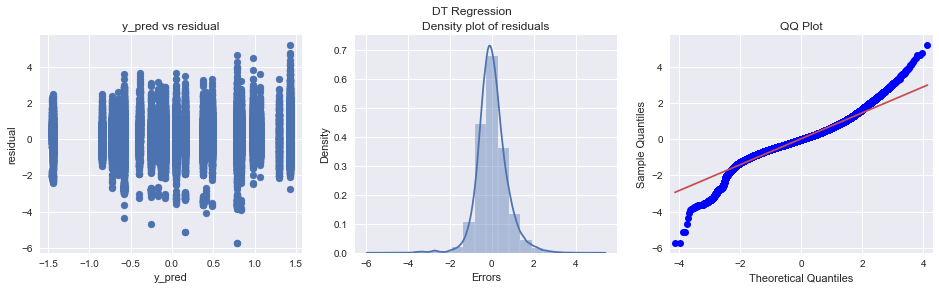

In [339]:
plot_errors(dt_model, X_validation, y_validation, 'DT Regression')


In [340]:
test_residual_results_dt = residual_errors(dt_model,X_validation, y_validation)

In [341]:
test_residual_results_dt['sales'] = validation['Sales'].copy()
test_residual_results_dt.head()

,Actual,predicted,residual,sales,predicted_sales
ID,,,,,
T1133439,-0.269899,0.050465,-0.320364,36021.96,41462.196142
T1133282,0.020006,-0.133096,0.153102,40927.41,38295.245150
T1133464,0.532782,-0.392470,0.925252,50425.62,34047.996714
T1133497,-0.581943,-0.133096,-0.448847,31112.88,38295.245150
T1133493,0.044560,0.050465,-0.005904,41358.24,41462.196142


In [342]:
regression_metrics(test_residual_results_dt, 'dt Regression')



Regression results for actual shares   :  dt Regression 

explained_variance:  0.4959
r2:  0.4902
MAE:  9433.3656
MSE:  193208629.8792
RMSE:  13899.9507
MSLE:  0.1187


### ExtraTreesRegressor

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.9s finished


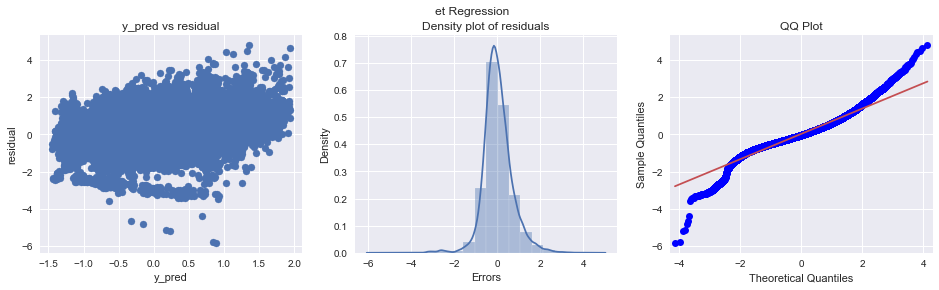

In [343]:
plot_errors(et_model, X_validation, y_validation, 'et Regression')

In [344]:
test_residual_results_et = residual_errors(et_model,X_validation, y_validation)


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.0s finished


In [345]:
test_residual_results_et['sales'] = validation['Sales'].copy()
test_residual_results_et.head()

,Actual,predicted,residual,sales,predicted_sales
ID,,,,,
T1133439,-0.269899,-0.298495,0.028596,36021.96,35556.126072
T1133282,0.020006,-0.321745,0.341751,40927.41,35179.767260
T1133464,0.532782,0.697061,-0.164279,50425.62,53692.513291
T1133497,-0.581943,-0.482473,-0.099469,31112.88,32636.183768
T1133493,0.044560,-0.075083,0.119644,41358.24,39281.649388


In [346]:
regression_metrics(test_residual_results_et, 'et Regression')



Regression results for actual shares   :  et Regression 

explained_variance:  0.5426
r2:  0.5327
MAE:  8913.8531
MSE:  177090130.1055
RMSE:  13307.5216
MSLE:  0.1102


### GradientBoostingRegressor

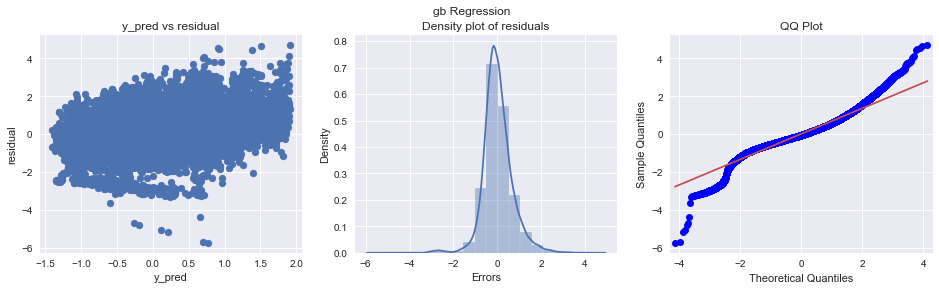

In [347]:
plot_errors(gb_model, X_validation, y_validation, 'gb Regression')

In [348]:
test_residual_results_gb = residual_errors(gb_model,X_validation, y_validation)

In [349]:
test_residual_results_gb['sales'] = validation['Sales'].copy()
test_residual_results_gb.head()

,Actual,predicted,residual,sales,predicted_sales
ID,,,,,
T1133439,-0.269899,-0.290302,0.020403,36021.96,35689.265372
T1133282,0.020006,-0.263646,0.283652,40927.41,36124.257543
T1133464,0.532782,0.439616,0.093166,50425.62,48621.364740
T1133497,-0.581943,-0.380469,-0.201474,31112.88,34238.649798
T1133493,0.044560,-0.084253,0.128814,41358.24,39124.840229


In [351]:
regression_metrics(test_residual_results_gb, 'gb Regression')



Regression results for actual shares   :  gb Regression 

explained_variance:  0.554
r2:  0.5447
MAE:  8765.7823
MSE:  172564911.2147
RMSE:  13136.3964
MSLE:  0.1088


### Adaboost Regressor

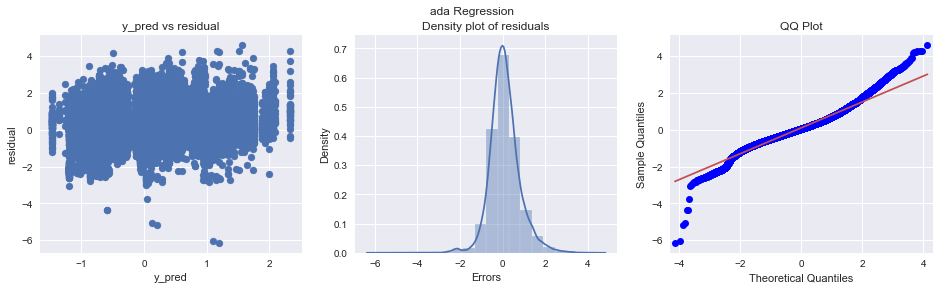

In [352]:
plot_errors(ada_model, X_validation, y_validation, 'ada Regression')

In [353]:
test_residual_results_ada = residual_errors(ada_model,X_validation, y_validation)

In [354]:
test_residual_results_ada['sales'] = validation['Sales'].copy()
test_residual_results_ada.head()

,Actual,predicted,residual,sales,predicted_sales
ID,,,,,
T1133439,-0.269899,-0.859423,0.589524,36021.96,27067.747650
T1133282,0.020006,-1.130798,1.150804,40927.41,23400.430869
T1133464,0.532782,-0.702766,1.235548,50425.62,29314.631682
T1133497,-0.581943,-1.355028,0.773085,31112.88,20583.782428
T1133493,0.044560,-0.835003,0.879563,41358.24,27411.726469


In [355]:
regression_metrics(test_residual_results_ada, 'ada Regression')



Regression results for actual shares   :  ada Regression 

explained_variance:  0.523
r2:  0.4979
MAE:  9327.7586
MSE:  190271430.0169
RMSE:  13793.891
MSLE:  0.1159


### BaggingRegressor

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   20.3s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   20.3s finished


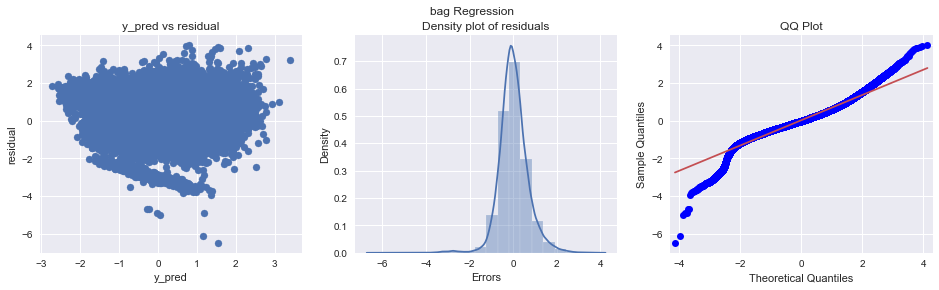

In [356]:
plot_errors(bag_model, X_validation, y_validation, 'bag Regression')

In [357]:
test_residual_results_bag = residual_errors(bag_model,X_validation, y_validation)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   12.2s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   12.2s finished


In [358]:
test_residual_results_bag['sales'] = validation['Sales'].copy()
test_residual_results_bag.head()

,Actual,predicted,residual,sales,predicted_sales
ID,,,,,
T1133439,-0.269899,-0.670196,0.400297,36021.96,29793.773584
T1133282,0.020006,-0.087882,0.107888,40927.41,39062.873099
T1133464,0.532782,0.572462,-0.039680,50425.62,51204.711816
T1133497,-0.581943,-0.541078,-0.040865,31112.88,31734.004327
T1133493,0.044560,-0.048056,0.092617,41358.24,39745.762331


In [359]:
regression_metrics(test_residual_results_bag, 'bag Regression')



Regression results for actual shares   :  bag Regression 

explained_variance:  0.5779
r2:  0.5718
MAE:  8748.9424
MSE:  162264195.6643
RMSE:  12738.2964
MSLE:  0.1108


### Stacking

In [360]:
stacking = pd.DataFrame()
stacking['lr']     = test_residual_results_lr['predicted'].values
stacking['xgbr']   = test_residual_results_xgbr['predicted'].values
stacking['rf']     = test_residual_results_rf['predicted'].values
stacking['dt']     = test_residual_results_dt['predicted'].values
stacking['et']     = test_residual_results_et['predicted'].values
stacking['gb']     = test_residual_results_gb['predicted'].values
stacking['bag']     = test_residual_results_bag['predicted'].values
stacking['ada']     = test_residual_results_ada['predicted'].values

stacking['actual'] = y_validation.values

In [361]:
stacking.head()

,lr,xgbr,rf,dt,et,gb,bag,ada,actual
0,-0.361939,-0.643044,-0.259440,0.050465,-0.298495,-0.290302,-0.670196,-0.859423,-0.269899
1,-0.381910,-0.678041,-0.049029,-0.133096,-0.321745,-0.263646,-0.087882,-1.130798,0.020006
2,1.020031,0.022089,0.650819,-0.392470,0.697061,0.439616,0.572462,-0.702766,0.532782
3,-0.750610,-1.085454,-0.344681,-0.133096,-0.482473,-0.380469,-0.541078,-1.355028,-0.581943
4,0.092457,-0.454800,-0.033149,0.050465,-0.075083,-0.084253,-0.048056,-0.835003,0.044560


In [362]:
from sklearn.linear_model import ElasticNet

In [363]:
stack_pipeline = Pipeline([("elasticnet", ElasticNet(random_state=0))])

stack_pipeline_params = {'elasticnet__l1_ratio':[0,0.2,0.5,0.8,1],
                            'elasticnet__alpha':[0.001,0.01,0.1,],
                           'elasticnet__fit_intercept':[True,False]}

stack_grid_pipeline = GridSearchCV(stack_pipeline, stack_pipeline_params, scoring= 'neg_mean_squared_error', 
                        cv = 5, 
                        return_train_score=True,
                        n_jobs=-1,
                        verbose = 1)
# fit
stack_grid_pipeline.fit(stacking[['lr','xgbr','rf', 'dt', 'et', 'gb', 'ada', 'bag']],stacking['actual'])
print(stack_grid_pipeline.best_params_)
stack_model = stack_grid_pipeline.best_estimator_
print(stack_grid_pipeline.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'elasticnet__alpha': 0.1, 'elasticnet__fit_intercept': False, 'elasticnet__l1_ratio': 0}
-0.39580493057035887


# Final Submission

In [364]:
print(unseen.shape)
unseen["Store_id"].replace(avg_sales_by_store_id, inplace=True)
unseen["Discount"].replace({'Yes':1,'No':0}, inplace=True)


(22265, 7)


In [365]:

unseen = encode_and_bind(unseen,"Store_Type")
unseen = encode_and_bind(unseen,"Location_Type")
unseen = encode_and_bind(unseen,"Region_Code")

In [366]:
unseen.drop(["Store_Type","Location_Type", "Region_Code"],axis=1,inplace=True)

unseen.head()

,Store_id,Date,Holiday,Discount,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R2,Region_Code_R3,Region_Code_R4
ID,,,,,,,,,,,,,,
T1188341,54291.0,2019-06-01,0,0,0,0,1,1,0,0,0,0,1,0
T1188342,38886.0,2019-06-01,0,0,0,0,0,0,0,0,0,0,0,0
T1188343,72951.0,2019-06-01,0,0,0,0,1,1,0,0,0,0,0,0
T1188344,36102.0,2019-06-01,0,0,0,0,0,0,0,0,0,0,0,1
T1188345,41193.0,2019-06-01,0,0,0,0,0,0,0,0,0,1,0,0


In [367]:
unseen['Month'] = unseen['Date'].dt.month
unseen['Day'] = unseen['Date'].dt.day
unseen['Dayofyear'] = unseen['Date'].dt.dayofyear
unseen['Weekofyear'] = unseen['Date'].dt.weekofyear
unseen['Dayofweek'] = unseen['Date'].dt.dayofweek
unseen['is_month_start'] = unseen['Date'].dt.is_month_start.astype(int)
unseen['is_month_end'] = unseen['Date'].dt.is_month_end.astype(int)
unseen['is_quarter_start'] = unseen['Date'].dt.is_quarter_start.astype(int)
unseen['is_quarter_end'] = unseen['Date'].dt.is_quarter_end.astype(int)

unseen.drop(['Date'], axis=1, inplace=True)


In [368]:
unseen['Dayofweek_sin_transform']=np.sin(2*math.pi*unseen['Dayofweek']/6)
unseen['Dayofweek_cos_transform']=np.cos(2*math.pi*unseen['Dayofweek']/6)
unseen['Month_sin_transform']=np.sin(2*math.pi*unseen['Month']/12) 
unseen['Month_cos_transform']=np.cos(2*math.pi*unseen['Month']/12)
#we divide by 6 or 12 to have a period of 6 and 12 instead of 2pi

In [369]:
store_id_scale_2=scaler.transform(unseen['Store_id'][:,np.newaxis])

In [370]:
store_id_scale_2

array([[0.4669441 ],
       [0.26535019],
       [0.71113379],
       ...,
       [0.27345006],
       [0.20500942],
       [0.12641332]])

In [372]:
unseen.drop(['Dayofweek', 'Month'], axis=1, inplace=True)

In [375]:
unseen['Store_id'] = store_id_scale_2

In [376]:
X_unseen =unseen.loc[:,unseen.columns !='Sales']

In [377]:
X_unseen.head()

,Store_id,Holiday,Discount,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,...,Dayofyear,Weekofyear,is_month_start,is_month_end,is_quarter_start,is_quarter_end,Dayofweek_sin_transform,Dayofweek_cos_transform,Month_sin_transform,Month_cos_transform
ID,,,,,,,,,,,,,,,,,,,,,
T1188341,0.466944,0,0,0,0,1,1,0,0,0,...,152,22,1,0,0,0,-0.866025,0.5,1.224647e-16,-1.0
T1188342,0.265350,0,0,0,0,0,0,0,0,0,...,152,22,1,0,0,0,-0.866025,0.5,1.224647e-16,-1.0
T1188343,0.711134,0,0,0,0,1,1,0,0,0,...,152,22,1,0,0,0,-0.866025,0.5,1.224647e-16,-1.0
T1188344,0.228918,0,0,0,0,0,0,0,0,0,...,152,22,1,0,0,0,-0.866025,0.5,1.224647e-16,-1.0
T1188345,0.295540,0,0,0,0,0,0,0,0,0,...,152,22,1,0,0,0,-0.866025,0.5,1.224647e-16,-1.0


### Linear Regression submission

In [378]:
linear_results =pd.DataFrame()
linear_results['lr']=  lm_4.predict(sm.add_constant(X_unseen)[X_train_4.columns])

In [379]:
submission_1_lr = pd.DataFrame()
submission_1_lr['ID'] = X_unseen.index
submission_1_lr['Sales'] = pt.inverse_transform(linear_results.lr.values[:, np.newaxis])

In [380]:
submission_1_lr.head()

,ID,Sales
0,T1188341,51831.626370
1,T1188342,36887.480663
2,T1188343,70603.651732
3,T1188344,34572.724538
4,T1188345,38688.060695


In [381]:
submission_1_lr.to_csv("submission_1_lr.csv", index=False)

### XGBR submission

In [382]:
y_unseen_pred_xgbr = xgbr_model.predict(X_unseen)

In [383]:
submission_2_xgbr = pd.DataFrame()
submission_2_xgbr['ID'] = X_unseen.index
submission_2_xgbr['Sales'] = pt.inverse_transform(y_unseen_pred_xgbr[:, np.newaxis])

In [384]:
submission_2_xgbr.head()

,ID,Sales
0,T1188341,54301.460938
1,T1188342,41420.652344
2,T1188343,73678.445312
3,T1188344,39478.820312
4,T1188345,43597.781250


In [385]:
submission_2_xgbr.to_csv("submission_2_xgbr.csv", index=False)

### RF submission

In [386]:
y_unseen_pred_rf = rf_model.predict(X_unseen)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.3s finished


In [387]:
submission_3_rf = pd.DataFrame()
submission_3_rf['ID'] = X_unseen.index
submission_3_rf['Sales'] = pt.inverse_transform(y_unseen_pred_rf[:, np.newaxis])

In [388]:
submission_3_rf.head()

,ID,Sales
0,T1188341,57401.813982
1,T1188342,39798.829986
2,T1188343,69930.324314
3,T1188344,37705.931928
4,T1188345,40120.306378


In [389]:
submission_3_rf.to_csv("submission_3_rf.csv", index=False)

### DT submission

In [390]:
y_unseen_pred_dt = dt_model.predict(X_unseen)

In [391]:
submission_4_dt = pd.DataFrame()
submission_4_dt['ID'] = X_unseen.index
submission_4_dt['Sales'] = pt.inverse_transform(y_unseen_pred_dt[:, np.newaxis])

In [392]:
submission_4_dt.head()

,ID,Sales
0,T1188341,59497.893116
1,T1188342,38295.245150
2,T1188343,59497.893116
3,T1188344,38295.245150
4,T1188345,38295.245150


In [393]:
submission_4_dt.to_csv("submission_4_dt.csv", index=False) # undnivvu,, vere analysis ki panikochiddi malli run cheyakunda

### ET submission

In [394]:
y_unseen_pred_et = et_model.predict(X_unseen)


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.4s finished


In [395]:
submission_5_et = pd.DataFrame()
submission_5_et['ID'] = X_unseen.index
submission_5_et['Sales'] = pt.inverse_transform(y_unseen_pred_et[:, np.newaxis])

In [396]:
submission_5_et.head()

,ID,Sales
0,T1188341,54329.153269
1,T1188342,36501.128537
2,T1188343,61198.315843
3,T1188344,35806.306117
4,T1188345,37107.577376


In [397]:
submission_5_et.to_csv("submission_5_et.csv", index=False)

### GB submission

In [398]:
y_unseen_pred_gb = gb_model.predict(X_unseen)

In [399]:
submission_6_gb = pd.DataFrame()
submission_6_gb['ID'] = X_unseen.index
submission_6_gb['Sales'] = pt.inverse_transform(y_unseen_pred_gb[:, np.newaxis])

In [400]:
submission_6_gb.head()

,ID,Sales
0,T1188341,53793.823483
1,T1188342,38102.926448
2,T1188343,63850.778845
3,T1188344,36692.365907
4,T1188345,39457.496346


In [401]:
submission_6_gb.to_csv("submission_6_gb.csv", index=False)

### BAG submission

In [402]:
y_unseen_pred_bag = bag_model.predict(X_unseen)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   19.2s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   19.2s finished


In [403]:
submission_7_bag = pd.DataFrame()
submission_7_bag['ID'] = X_unseen.index
submission_7_bag['Sales'] = pt.inverse_transform(y_unseen_pred_bag[:, np.newaxis])

In [404]:
submission_7_bag.head()

,ID,Sales
0,T1188341,61801.725510
1,T1188342,42789.379591
2,T1188343,74098.235112
3,T1188344,39608.494696
4,T1188345,43250.880148


In [405]:
submission_7_bag.to_csv("submission_7_bag.csv", index=False)

### ADA submission

In [406]:
y_unseen_pred_ada = ada_model.predict(X_unseen)

In [407]:
submission_8_ada = pd.DataFrame()
submission_8_ada['ID'] = X_unseen.index
submission_8_ada['Sales'] = pt.inverse_transform(y_unseen_pred_ada[:, np.newaxis])

In [408]:
submission_8_ada.head()

,ID,Sales
0,T1188341,51203.968759
1,T1188342,42126.913811
2,T1188343,72556.415091
3,T1188344,32983.336947
4,T1188345,43933.272780


In [409]:
submission_8_ada.to_csv("submission_8_ada.csv", index=False)

## Stacking on unseen dataset

In [410]:
unseen_stacking = pd.DataFrame()

unseen_stacking['lr']     = linear_results['lr'].values
unseen_stacking['xgbr']   = xgbr_model.predict(X_unseen)
unseen_stacking['rf']     = rf_model.predict(X_unseen)
unseen_stacking['dt']     = dt_model.predict(X_unseen)
unseen_stacking['et']     = et_model.predict(X_unseen)
unseen_stacking['gb']     = gb_model.predict(X_unseen)
unseen_stacking['bag']    = bag_model.predict(X_unseen)
unseen_stacking['ada']    = ada_model.predict(X_unseen)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    9.4s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    9.4s finished


In [411]:
unseen_stacking.head()

,lr,xgbr,rf,dt,et,gb,bag,ada
0,0.604159,0.727088,0.877256,0.976346,0.728449,0.702069,1.083136,0.572424
1,-0.217286,0.048106,-0.044977,-0.133096,-0.240689,-0.144499,0.125163,0.088034
2,1.472746,1.602692,1.443890,0.976346,1.055374,1.176347,1.620207,1.555614
3,-0.359526,-0.063581,-0.168135,-0.133096,-0.283113,-0.229088,-0.056032,-0.460153
4,-0.109899,0.170059,-0.026368,-0.133096,-0.204011,-0.064823,0.150848,0.188561


In [412]:
stacking_submission = pd.DataFrame()
stacking_submission['ID']= X_unseen.index
stacking_submission['Sales'] = pt.inverse_transform(stack_model.predict(unseen_stacking)[:, np.newaxis]) 

In [413]:
stacking_submission.head()

,ID,Sales
0,T1188341,57351.393736
1,T1188342,39665.752293
2,T1188343,74618.254589
3,T1188344,36372.669108
4,T1188345,41181.450632


In [414]:
stacking_submission.to_csv("submission_9_stacking.csv", index= False)